## Exercici 1
**Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.**

In [96]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib import pyplot


In [2]:
df = pd.read_csv('Publicacions Facebook Thailandia.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.shape

(7050, 16)

In [4]:
df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [6]:
df.groupby('status_type').mean()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
status_type,,,,,,,,,,,,,
link,370.142857,5.698413,4.396825,369.619048,0.301587,0.190476,0.031746,0.000000,0.000000,NaN,NaN,NaN,NaN
photo,181.290345,15.993470,2.553871,178.778451,1.445196,0.684701,0.190765,0.142491,0.045709,NaN,NaN,NaN,NaN
status,438.783562,36.238356,2.558904,435.528767,1.561644,1.172603,0.109589,0.386301,0.024658,NaN,NaN,NaN,NaN
video,283.409597,642.478149,115.679949,243.015424,35.540274,2.448158,1.735219,0.413882,0.254070,NaN,NaN,NaN,NaN


In [7]:
df['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

[]

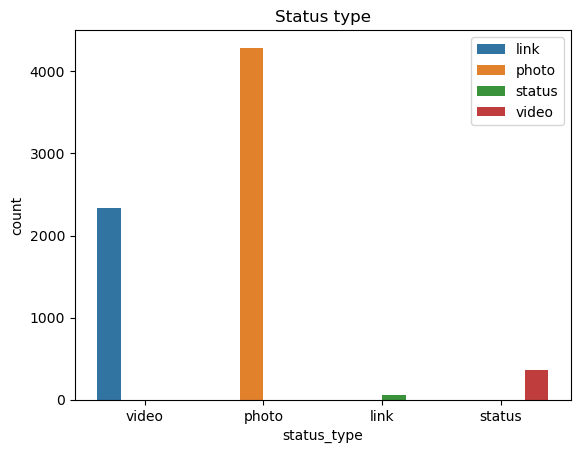

In [8]:
fig = sns.countplot(x='status_type', hue='status_type', data=df)
fig.set_title('Status type')
fig.set_xlabel('status_type')
fig.set_ylabel('count')
fig.legend(labels = ['link', 'photo', 'status', 'video'])

fig.plot()

In [9]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [10]:
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [11]:
# Esborrem les columnes que no ens aporten res
df1 = df.drop(['Column1', 'Column2', 'Column3', 'Column4', 'status_id', 'status_published'], axis=1, inplace=True)

In [12]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

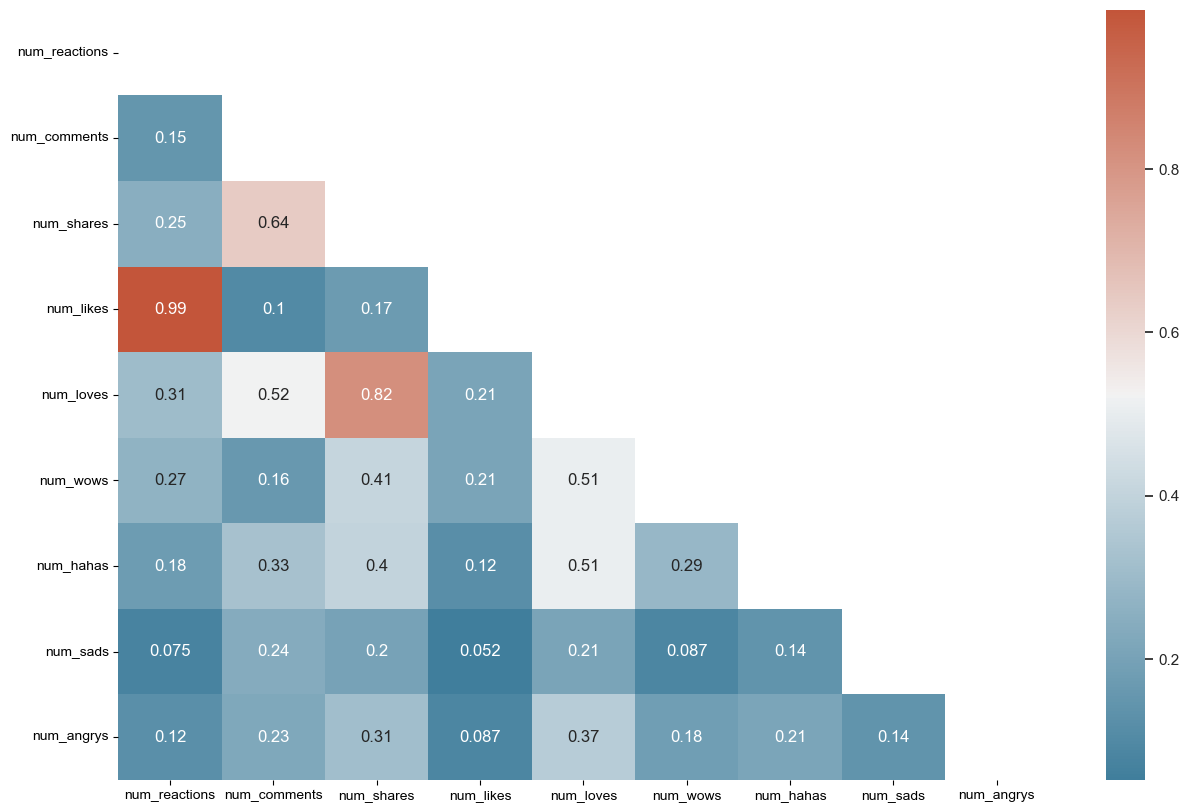

In [13]:
# matriu de correlació
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_theme(style="white")
matrix = np.triu(df.corr())
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap=cmap)

In [14]:
X = df

y = df['status_type']

In [15]:
#categortizem la columna de status type
le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int32
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 523.4 KB


In [17]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [18]:
df.dtypes

status_type      int32
num_reactions    int64
num_comments     int64
num_shares       int64
num_likes        int64
num_loves        int64
num_wows         int64
num_hahas        int64
num_sads         int64
num_angrys       int64
dtype: object

<AxesSubplot:>

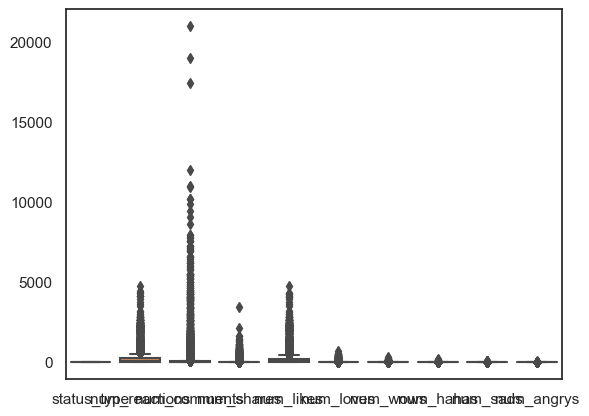

In [19]:
# revisem outliers, primer en conjunt i desprès en cada variable
sns.boxplot(data=df)

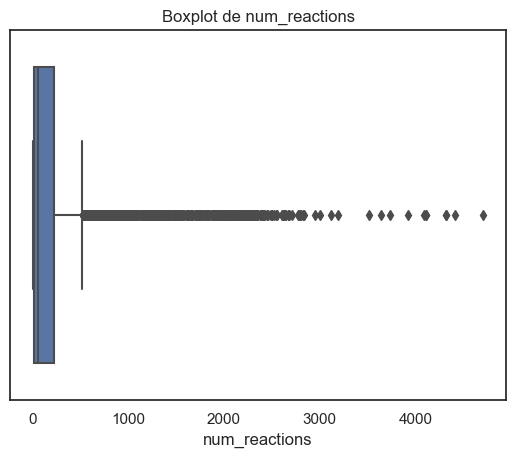

In [20]:
fa = df['num_reactions']
sns.boxplot(x=fa).set_title('Boxplot de num_reactions');

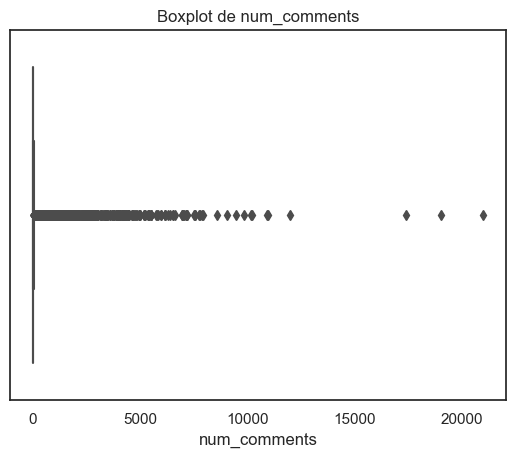

In [21]:
fa = df['num_comments']
sns.boxplot(x=fa).set_title('Boxplot de num_comments');

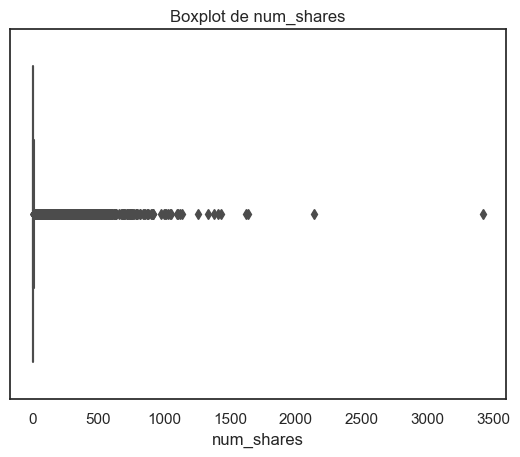

In [22]:
fa = df['num_shares']
sns.boxplot(x=fa).set_title('Boxplot de num_shares');

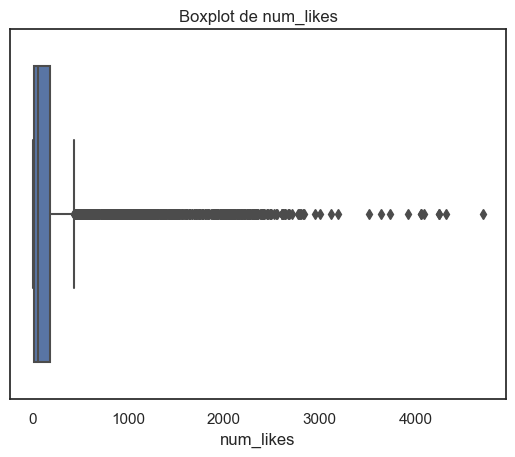

In [23]:
fa = df['num_likes']
sns.boxplot(x=fa).set_title('Boxplot de num_likes');

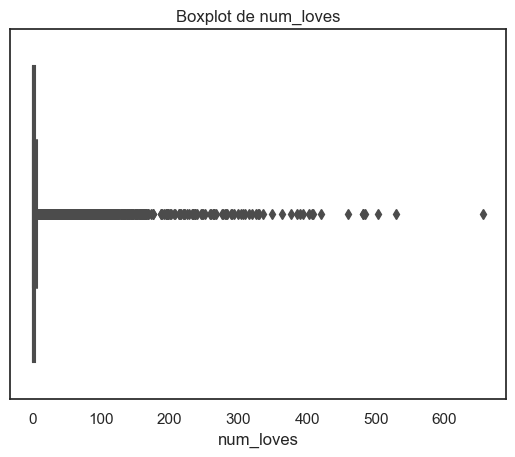

In [24]:
fa = df['num_loves']
sns.boxplot(x=fa).set_title('Boxplot de num_loves');

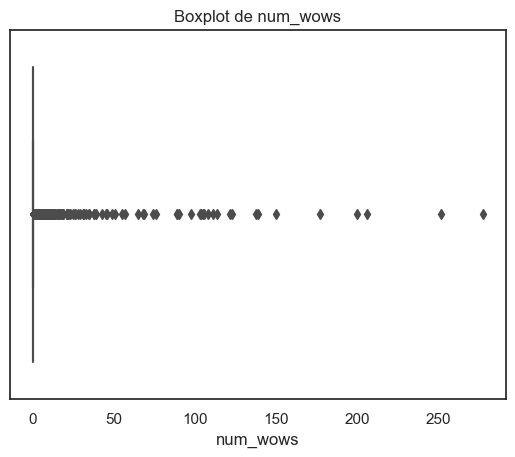

In [25]:
fa = df['num_wows']
sns.boxplot(x=fa).set_title('Boxplot de num_wows');

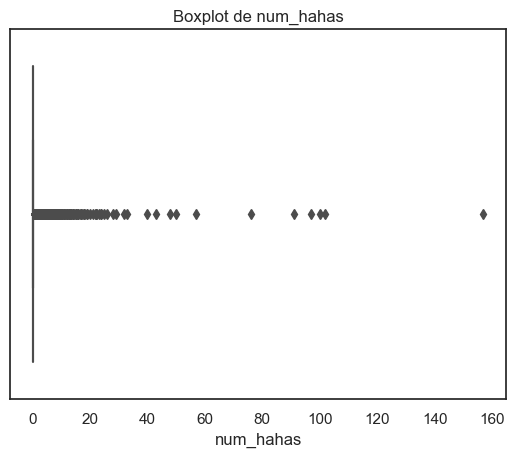

In [26]:
fa = df['num_hahas']
sns.boxplot(x=fa).set_title('Boxplot de num_hahas');

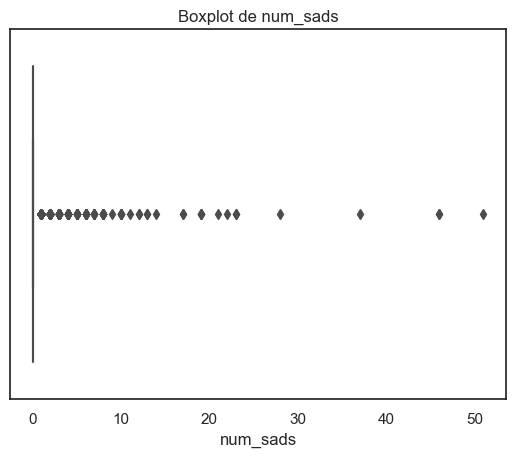

In [27]:
fa = df['num_sads']
sns.boxplot(x=fa).set_title('Boxplot de num_sads');

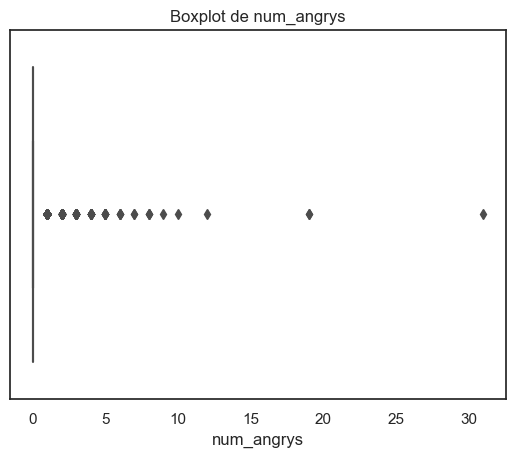

In [28]:
fa = df['num_angrys']
sns.boxplot(x=fa).set_title('Boxplot de num_angrys');

In [29]:
# identifiquem Outliers
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

<IPython.core.display.Javascript object>

In [30]:
# fem neteja
df_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

In [31]:
df_clean.shape

(4123, 10)

In [32]:
# escalem les dades 
cols = X.columns

In [33]:

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [34]:
X = pd.DataFrame(X, columns=[cols])

In [35]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [36]:
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [37]:
kmeans.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

El algoritmo KMeans agrupa los datos tratando de separar muestras en n grupos de varianzas iguales, minimizando un criterio conocido como inercia. La inercia, se puede reconocer como un medida de cuán internamente coherentes son los clústeres.

El algoritmo K-means tiene como objetivo elegir centroides que minimicen la inercia, o la suma de criterios al cuadrado dentro del grupo.
inercia
La inercia no es una métrica normalizada.

Los valores más bajos de inercia son mejores y el cero es óptimo.

Pero en espacios de dimensiones muy altas, las distancias euclidianas tienden a inflarse (este es un ejemplo de maldición de la dimensionalidad).

Ejecutar un algoritmo de reducción de dimensionalidad como PCA antes del agrupamiento de k-means puede aliviar este problema y acelerar los cálculos.

In [38]:
kmeans.inertia_

237.75726404419547

*Cuanto menor sea la inercia del modelo, mejor será el ajuste del modelo.*

*Podemos ver que el modelo tiene una inercia muy alta. Por lo tanto, este no es un buen modelo que se ajuste a los datos*

In [39]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 63 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


Hemos logrado una precisión de clasificación débil del 1 % con nuestro modelo no supervisado.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

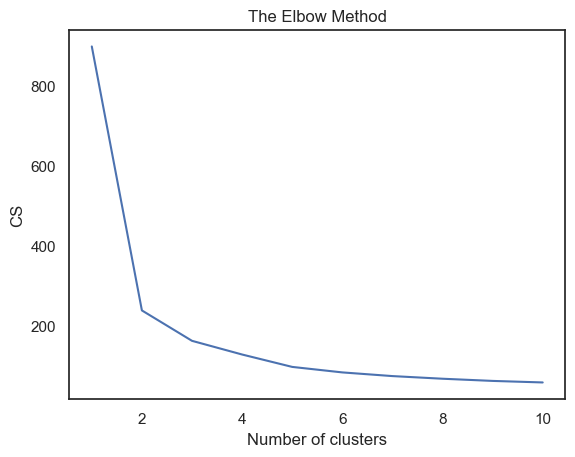

In [116]:

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

Por lo tanto, k=2 puede considerarse un buen número del grupo para agrupar estos datos.

In [117]:
kmeans2 = KMeans(n_clusters=2,random_state=0)

kmeans2.fit(X)

labels = kmeans2.labels_
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)));

Result: 63 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


In [118]:
kmeans2.inertia_

237.75726404419547

In [119]:
# como tenemos un accuracy dèbil, probamos con otros grupos: 3 clusters
kmeans3 = KMeans(n_clusters=3, random_state=0)

kmeans3.fit(X)


labels = kmeans3.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)));

Result: 138 out of 7050 samples were correctly labeled.
Accuracy score: 0.02


In [120]:
kmeans3.inertia_

161.59633400033613

In [123]:
# 4 clusters
kmeans4 = KMeans(n_clusters=4, random_state=0)

kmeans4.fit(X)


labels = kmeans4.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


In [122]:
kmeans4.inertia_

127.31313212987814

Acuraccy relativamente alta con 4 clusters

In [113]:
# utilizamos el pca para reducir la dimensionalidad
pca=PCA(n_components=2)
 
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
 
reduced_X.head()

,PCA1,PCA2
0,0.446218,0.068944
1,-0.237240,-0.010435
2,0.429787,-0.028372
3,-0.237808,-0.021956
4,-0.235285,0.008596


In [107]:
centers=pca.transform(kmeans.cluster_centers_)
 
centers

array([[-0.23802469, -0.03123719],
       [ 0.42656153, -0.05701206],
       [ 0.18830412,  0.32934991],
       [ 0.44556044,  0.00845223],
       [-0.21743477,  0.62660401],
       [ 0.09382537, -0.03736599],
       [ 0.49145725,  0.34537653],
       [ 0.44981726,  0.59071161],
       [-0.22663381,  0.26195028],
       [-0.56757619,  0.02239133]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

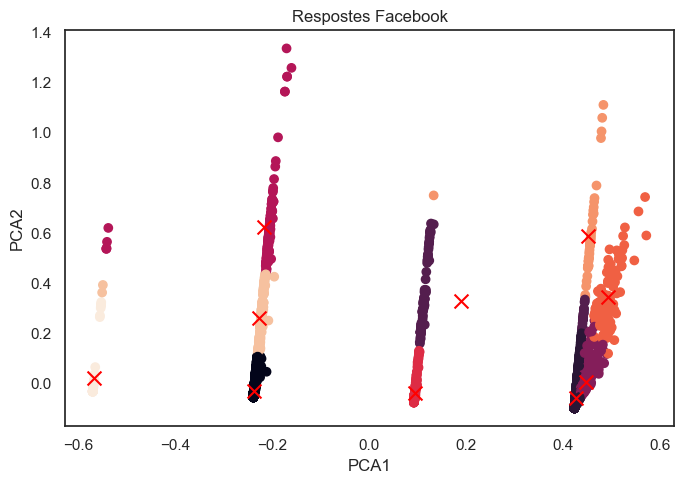

In [109]:

plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Respostes Facebook')
plt.tight_layout()

## Exercici 2
**Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

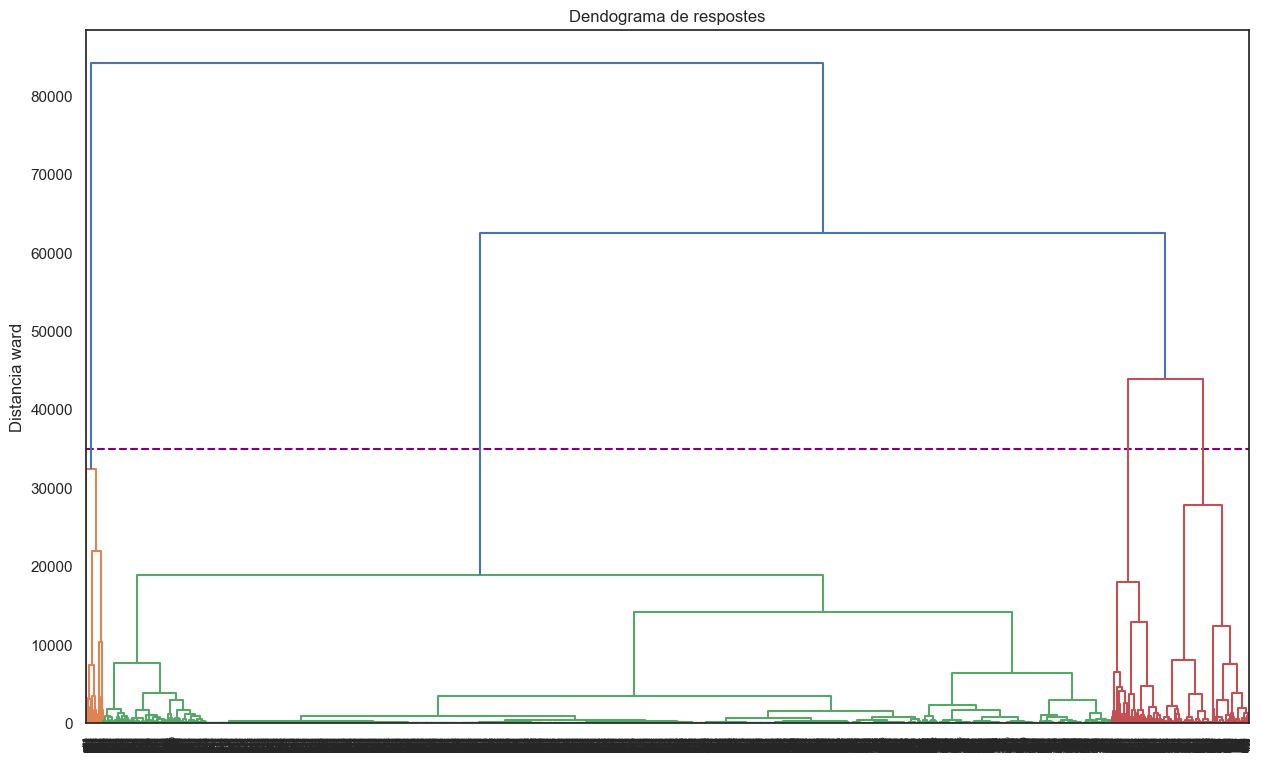

In [104]:
# Plot del dendograma
plt.figure(figsize=(15, 9))
plt.title("Dendograma de respostes")
plt.ylabel("Distancia ward")
plt.axhline(y=35000, color='purple', linestyle='--')


dend = shc.dendrogram(shc.linkage(df, method='ward'))  

In [79]:
from sklearn.cluster import AgglomerativeClustering 
# Creamos el modelo
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

# Lo ajustamos con los datos
y_predicted = cluster.fit_predict(df)  

In [80]:
df["cluster"]=y_predicted

df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,3,529,512,262,432,92,3,1,1,0,2
1,1,150,0,0,150,0,0,0,0,0,2
2,3,227,236,57,204,21,1,1,0,0,2
3,1,111,0,0,111,0,0,0,0,0,2
4,1,213,0,0,204,9,0,0,0,0,2


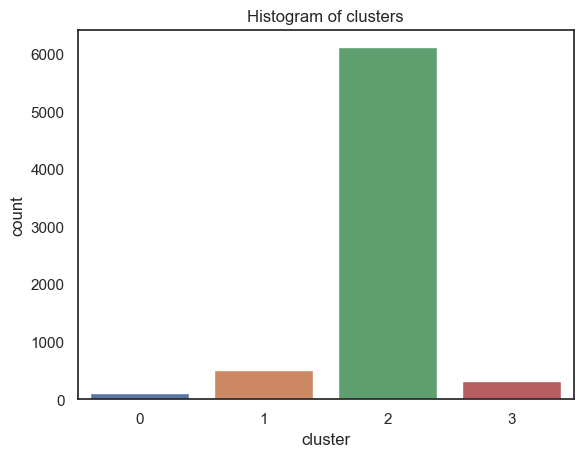

In [93]:
pl = sns.countplot(x=df['cluster'])
pl.set_title("Histogram of clusters");

## Exercici 3
**Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.**

In [58]:

# Kmeans con 4 clusters

km = KMeans(n_clusters=4, random_state=42)


km.fit_predict(X)

# Calculamos Silhoutte Score

score = silhouette_score(X, km.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.776


La puntuación de la silueta se encuentra dentro del rango [-1, 1]. La puntuación de silueta de 1 significa que los racimos son muy densos y bien separados. La puntuación de 0 significa que los clústeres se superponen. La puntuación inferior a 0 significa que los datos pertenecientes a los clústeres pueden ser erróneos/incorrectos